# **Customer Churn Prediction**
### Machine Learning with Python
---
**Author:** Hai Pham

## 1. Business Problem

Customer retention is key to sustainable growth for Software-as-a-Service (SaaS) companies since the cost of retaining existing customers is much less than acquiring new ones. Customers, however, now retract their loyalty more quickly than they did a few years ago. Therefore, identifying factors that affect customers’ decision on canceling a subscription is becoming increasingly crucial for these firms.

My goal is to develop a prediction model using Machine Learning that helps those firms identify customers that are likely to discontinue their services so that those firms can take necessary actions to retain their current customers. Due to unavailability of customer data of SaaS companies, I searched for similar data in other industries as a proxy and came up with a dataset of a telecommunication firm on Kaggle. With subscription-based business of telecommunication, this customer dataset would be a good alternative to that of SaaS. The inputs for this project would be customer’s historical behaviors. Based on those data a classification model is trained and then used to predict if certain customers are going to discontinue services.

## 2. Data Loading

First let's import packages necessary for this analysis:

In [1]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

The dataset is obtained from Kaggle and then uploaded to dropbox so we can load it from a url.

In [2]:
data_url = 'https://www.dropbox.com/s/sj4ua510qwr34qs/Orange%20Telecom%20dataset.csv?dl=1'
dat = pd.read_csv(data_url, na_values=np.NaN)

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
# Take a look at the first 5 rows
dat.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


The dataset used for this project includes customers’ usage data of a telecomcomunications company, Orange S.A. (“Orange”), and is publicly available on Kaggle. The dataset consists of `3,333` observations, each of which describes a unique customer. There are `20` variables, 19 of which are customers’ demographic and usage data and 1 churn label specifying whether a customer continues or discontinues Orange ’s services.
- State: 51 states in the US
- Account length: number of days from account opening to data collection time, ranging from 1 to 243 days
- Area code: 415 relates to San Francisco, 408 is of San Jose and 510 is of City of Oakland
- International plan: Yes indicates that international plan is present and No indicates no subscription for intertional plan
- Voice mail plan: Yes indicates that voice mail plan is present and No indicates no subscription for voice mail plan
- Number vmail messages: number of voice mail messages
- Total day minutes: total number of minutes spent by customer in morning and afternoon
- Total day calls: total number of calls made by customer in morning and afternoon
- Total day charge: total charge to the customer in morning and afternoon
- Total eve minutes: total number of minutes spent by customer in evening
- Total eve calls: total number of calls made by customer in evening
- Total eve charge: total charge to the customer in evening
- Total night minutes: total number of minutes spent by customer in night
- Total night calls: total number of calls made by customer in night
- Total night charge: total charge to the customer in night
- Total intl minutes: total number of minutes spent by customer on international calls
- Total intl calls: total number of international calls made by customer
- Total intl charge: total charge to the customer for international calls
- Customer service calls: total number of customer services calls made by customer
- Churn: Yes indicates that customer cancel the subscription while No indicates that customer continue services.There are 2,850 customers in this dataset continuing Orange’s service and 483 people churn

It is clear that `State` and `Area code` have no predictive power so let's remove them from our dataset.

In [5]:
dat = dat.drop(columns = ['State','Area code'])
dat.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


## 3. Descriptive Analytics ##

In [6]:
# Set up seaborn plots
sns.set(rc = {'figure.figsize': (8, 6)},
        font_scale = 1.25) 
sns.set_style('whitegrid')

Plot a distribution of target variable `Churn`:

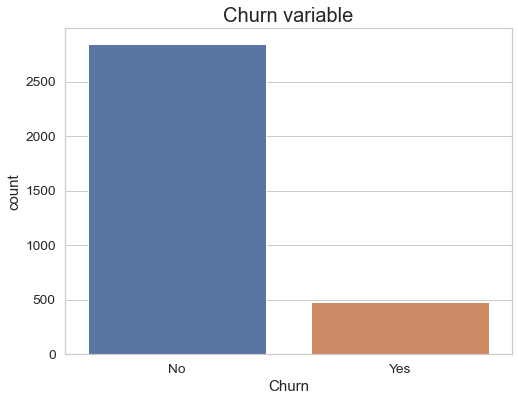

In [7]:
sns.countplot(x = 'Churn',
             data = dat).set_title('Churn variable', fontsize = 20);

We can tell that this is an imbalanced dataset with 2,850 No values and 483 Yes values in response variable. Now let's visualize the relationship between `Churn` and three categorical variables: `International plan`, and `Voice mail plan`

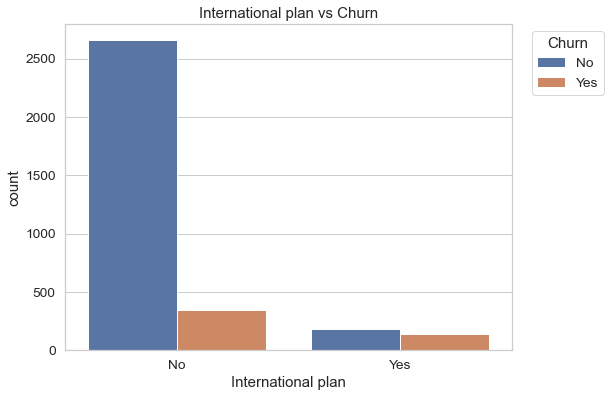

In [8]:
sns.countplot(x = 'International plan', 
            hue = 'Churn',
            data = dat).set(title = 'International plan vs Churn');

plt.legend(bbox_to_anchor = (1.03, 1), title = 'Churn', loc= 2);

- Customers with no international plan subscription are more likely to churn.

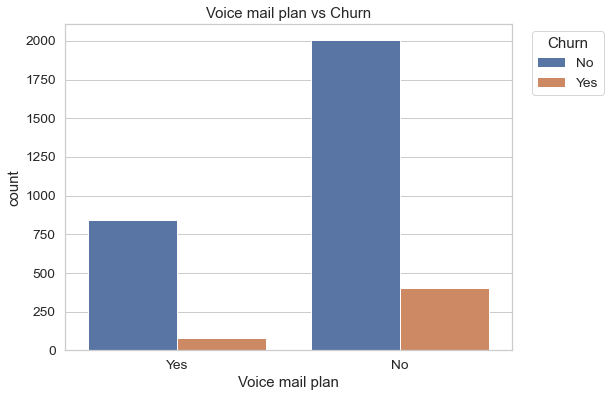

In [9]:
sns.countplot(x = 'Voice mail plan', 
            hue = 'Churn',
            data = dat).set(title = 'Voice mail plan vs Churn');

plt.legend(bbox_to_anchor = (1.03, 1), title = 'Churn', loc= 2);

- Customers without voice mail plan subscription are more likely to churn.

Next we explore relationship between `Churn` and other numeric variables:

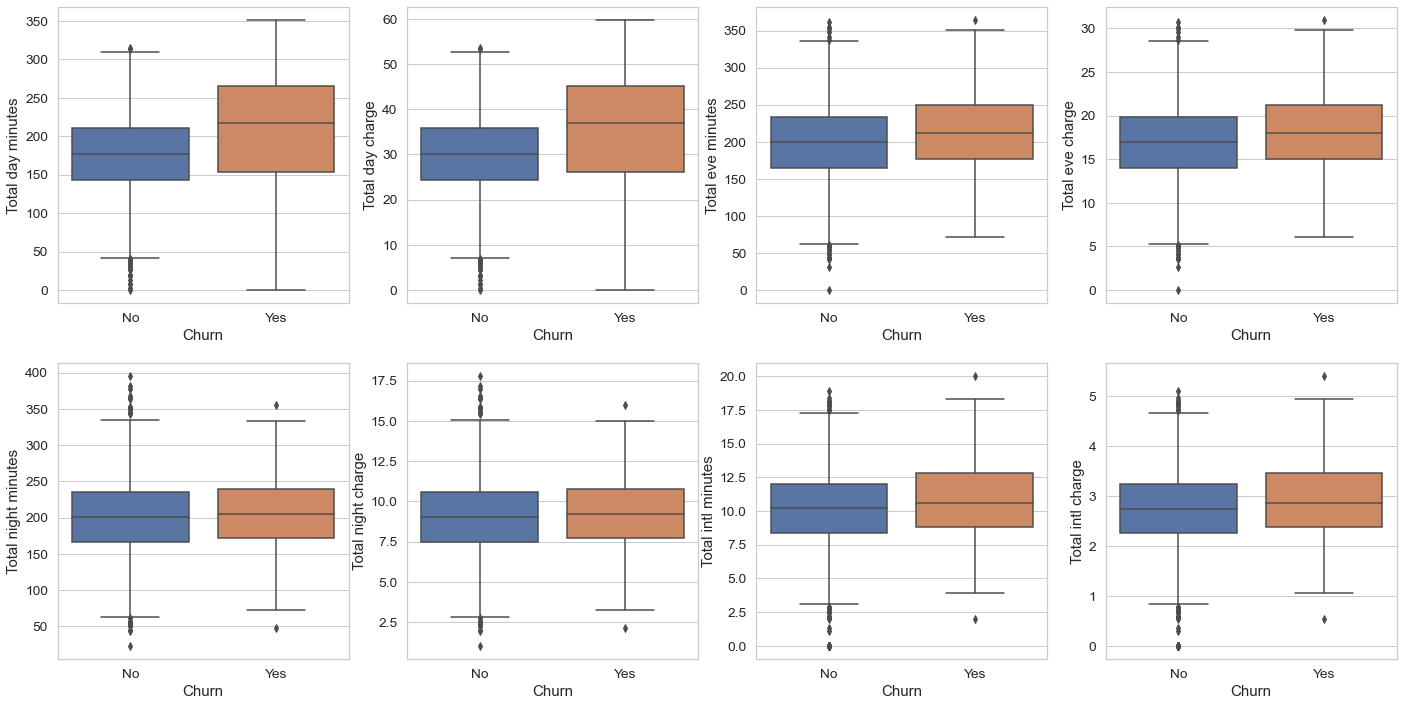

In [10]:
predictors_float = list(dat.select_dtypes(include = ['float64']).columns)

plt.figure(figsize=(24,12))

for i, c in enumerate(predictors_float, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x ='Churn',
                y = c,
                data = dat)

Based on the above charts, we can see:
- Customers that have longer day calls and incur higher day charges are more likely to churn.
- Customers that have longer evening calls and incure higher evening charges are more likely to churn.
- Customers that have longer international calls and incur higher international charges are more likely to churn.

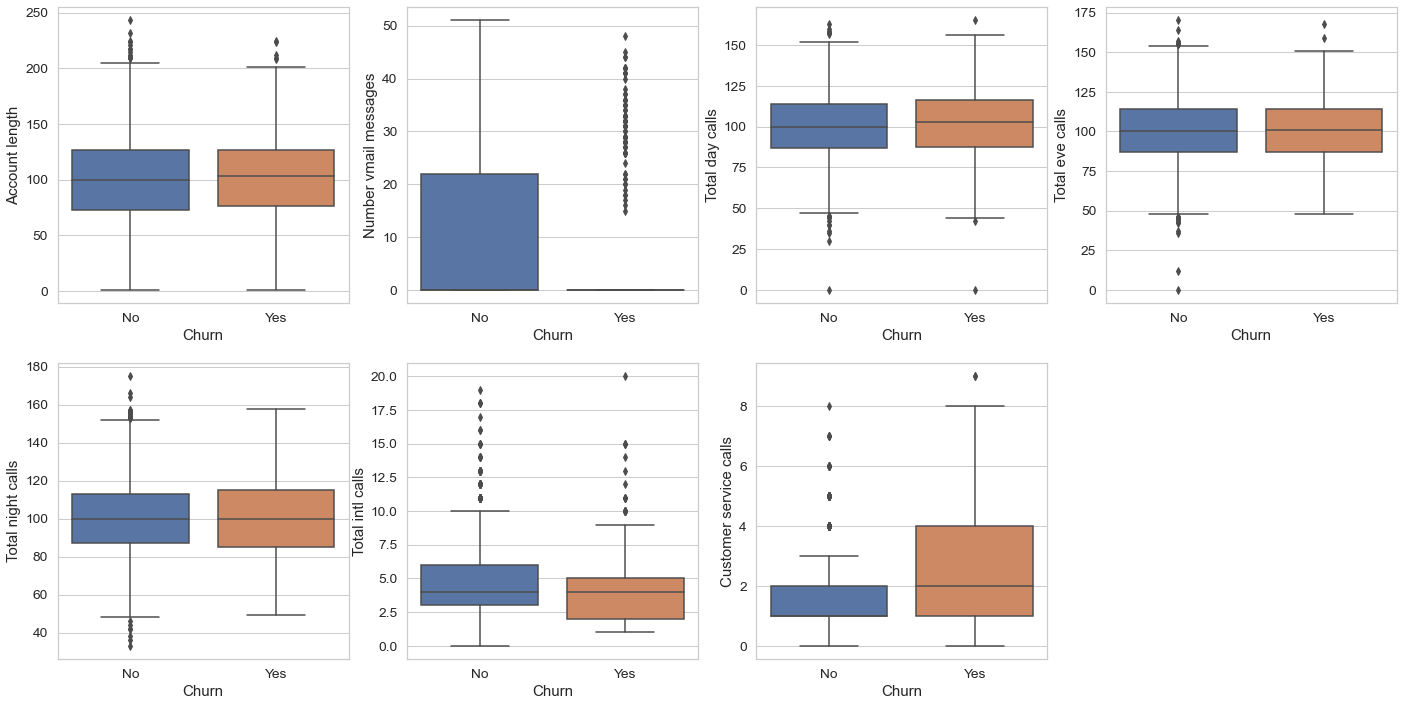

In [11]:
predictors_integer = list(dat.select_dtypes(include = ['int64']).columns)

plt.figure(figsize=(24,12))

for i, c in enumerate(predictors_integer, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x ='Churn',
                y = c,
                data = dat)

- Customers that make more calls to customer service are more likely to churn.

Now let's see interaction effect of predictors on target variable `Churn`

In [12]:
plotDat = (dat.
           assign(roundedIntlCharge = round(dat['Total intl charge'], 0)).
           groupby(['International plan', 'roundedIntlCharge']).
           apply(lambda x: len(x.Churn[x.Churn == "Yes"])/len(x.Churn)).
           reset_index().
           rename(columns = {0: 'proportionChurn'}))
plotDat.head()

,International plan,roundedIntlCharge,proportionChurn
0,No,0.0,0.000000
1,No,1.0,0.105691
2,No,2.0,0.118736
3,No,3.0,0.113514
4,No,4.0,0.121348


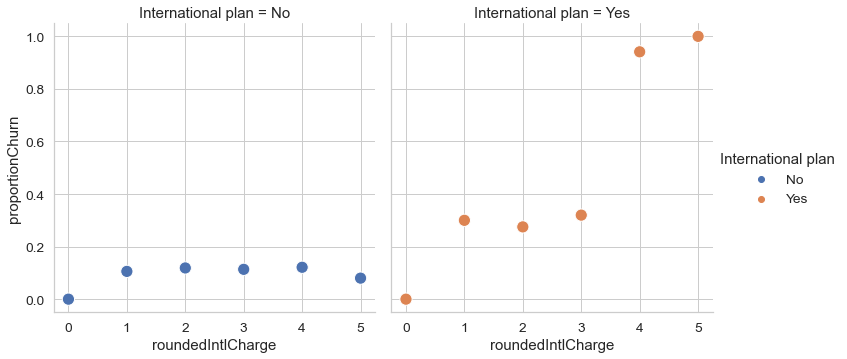

In [13]:
sns.relplot(
    x = 'roundedIntlCharge',
    y = 'proportionChurn',
    s = 150,
    hue = 'International plan',
    col = 'International plan',
    kind = 'scatter',
    data = plotDat);

Contrary to the initial plot, customers with international plan are actually more likely to churn than customers without international plan. And the higher international charges they incur, the more likely they are to churn. This can be explained that customers that don't sign up for internation plans may sometimes make international calls and these infrequent charges don't matter much to them. But for customers that sign up for international plan, they have intention to make international calls frequently. So if they incur high charges, they will discontinue services.

We can confirm this finding by grouping customers by `International plan` and diving deep into the proportion of customer churn.

In [14]:
dat.groupby(by =['International plan', 'Churn']).size()

International plan  Churn
No                  No       2664
                    Yes       346
Yes                 No        186
                    Yes       137
dtype: int64

In [15]:
round(dat.groupby(by =['International plan', 'Churn']).size()/dat.groupby('International plan').size(),2)

International plan  Churn
No                  No       0.89
                    Yes      0.11
Yes                 No       0.58
                    Yes      0.42
dtype: float64

The number of customer churn in the group of `no` international plan is higher than `yes` international plan. But the percentage of customer churn in the group of 'no' international plan is actually lower.

## 4. Machine Learning

In the previous section, we get a sense of which features have more impact on customer churn. Now let's train multiple machine learning models using as many meaningful predictors as available in an effort to find the optimal predictive model. This model would be used to predict whether a new customer discontinues service.

Prior to model fitting, we need to conduct data preprocessing which includes train and test set split, class balancing, handling of missing values, categorical variable conversion, removal zero-variance features, and feature scaling.

## 4.1. Data preprocessing

### Train and test set split

First let's split our dataset into training set with 80% of instances and test set of 20% instances. The training set will be used to train the model and the test set will be used to evaluate models' generalization performance.

In [16]:
Train, Test = train_test_split(dat, 
                               stratify = dat.Churn,
                               test_size = 0.20, 
                               random_state = 101)

### Class balancing

The previous visualization shows that there's class imbalance in original dataset so we need to check issue in the training set as well.

In [17]:
display(Train.groupby('Churn').size(),
round(Train.groupby('Churn').size()/len(Train), 3))

Churn
No     2280
Yes     386
dtype: int64

Churn
No     0.855
Yes    0.145
dtype: float64

This target class is highly skewed with 85% No and 15% Yes, posing a challenge for predictive modeling since most machine learning algorithms assume an equal number of instances for each class. Let's resolve this issue by downsampling the majority class (i.e. no) in the training data:

In [18]:
np.random.seed(101)

major_class = np.where(Train.Churn == 'No')[0]
minor_class = np.where(Train.Churn == 'Yes')[0]

resample = np.random.choice(major_class, size = len(minor_class), replace = False)

TrainDS = pd.concat([Train.iloc[minor_class], Train.iloc[resample]])

TrainDS.shape

(772, 18)

Check the output again to make sure we are having a balance class:

In [19]:
display(TrainDS.groupby('Churn').size(),
round(TrainDS.groupby('Churn').size()/len(TrainDS), 3))

Churn
No     386
Yes    386
dtype: int64

Churn
No     0.5
Yes    0.5
dtype: float64

### Handling missing values

Next let's check missing values in the training set to take care of them since some machine learning models can't handle missing values:

In [20]:
TrainDS.isna().sum()

Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There's no missing data in the training data so we can move forward with other pre-processing steps.

### Converting categorical variables to dummy attributes

In [21]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Enc.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2071,124,0,312.0,112,53.04,180.0,109,15.30,168.6,94,7.59,12.8,4,3.46,1,Yes,1.0,0.0,1.0,0.0
3218,112,0,266.0,97,45.22,214.6,94,18.24,306.2,100,13.78,14.2,2,3.83,2,Yes,1.0,0.0,1.0,0.0
201,108,0,198.5,99,33.75,267.8,60,22.76,354.9,75,15.97,9.4,3,2.54,0,Yes,1.0,0.0,1.0,0.0
2682,77,0,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,9.8,7,2.65,2,Yes,1.0,0.0,1.0,0.0
871,111,0,176.9,128,30.07,102.8,56,8.74,213.7,84,9.62,10.5,2,2.84,4,Yes,1.0,0.0,1.0,0.0


In [22]:
TrainDS_Enc.shape

(772, 20)

### Removing zero-variance features

Features with zero variance have almost no predictive power so let's remove them using a variance threshold approach.

In [23]:
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Enc.drop(columns = 'Churn')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_EncSel = pd.concat([TrainDS_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_EncSel.head()

,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2071,Yes,124,0,312.0,112,53.04,180.0,109,15.30,168.6,94,7.59,12.8,4,3.46,1,1.0,0.0,1.0,0.0
3218,Yes,112,0,266.0,97,45.22,214.6,94,18.24,306.2,100,13.78,14.2,2,3.83,2,1.0,0.0,1.0,0.0
201,Yes,108,0,198.5,99,33.75,267.8,60,22.76,354.9,75,15.97,9.4,3,2.54,0,1.0,0.0,1.0,0.0
2682,Yes,77,0,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,9.8,7,2.65,2,1.0,0.0,1.0,0.0
871,Yes,111,0,176.9,128,30.07,102.8,56,8.74,213.7,84,9.62,10.5,2,2.84,4,1.0,0.0,1.0,0.0


In [24]:
TrainDS_EncSel.shape

(772, 20)

The number of features remains unchanged so there was no zero variance features

### Scaling features

Machine Learning algorithms don't perform well when the input numberical features have very different scales. They make assumption that high ranging numbers have more predictive power than low ranging numbers. Let's mitigate this issue by leveraging Robust Scaler from `sklearn` to scale our numerical features.

In [25]:
scaler = RobustScaler()

sca_raw_data_train = TrainDS_EncSel.drop(columns = 'Churn').select_dtypes(exclude = ['object', 'category'])

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_EncSelSca = pd.concat([TrainDS_EncSel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_EncSelSca.head()

,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2071,Yes,0.432692,0.0,1.391232,0.380952,1.391403,-0.353641,0.333333,-0.353523,-0.512177,-0.222222,-0.511093,0.705882,0.0,0.714286,-0.5,0.0,0.0,0.0,0.0
3218,Yes,0.201923,0.0,0.883926,-0.190476,0.884023,0.130952,-0.222222,0.131026,1.518819,0.000000,1.523418,1.117647,-1.0,1.120879,0.0,0.0,0.0,0.0,0.0
201,Yes,0.125000,0.0,0.139509,-0.114286,0.139822,0.876050,-1.481481,0.875979,2.237638,-0.925926,2.243221,-0.294118,-0.5,-0.296703,-1.0,0.0,0.0,0.0,0.0
2682,Yes,-0.471154,0.0,0.727323,-1.142857,0.727656,0.006303,0.962963,0.005768,1.061255,0.333333,1.063270,-0.176471,1.5,-0.175824,0.0,0.0,0.0,0.0,0.0
871,Yes,0.182692,0.0,-0.098704,0.990476,-0.098946,-1.434874,-1.629630,-1.434693,0.153506,-0.592593,0.156122,0.029412,-1.0,0.032967,1.0,0.0,0.0,0.0,0.0


### Pre-processing test set

Those are all pre-processing steps for training set. Now we need to apply all of what we performed earlier to the test set as well so we can evaluate models' generalization performance. In order to avoid ***data leakage***, we need to pre-process test set using values from training set.

In [26]:
# Take a look at the first 5 rows of test set
Test.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
413,60,Yes,Yes,29,265.9,113,45.20,215.8,94,18.34,108.1,82,4.86,14.0,12,3.78,0,Yes
2229,121,No,Yes,44,116.0,85,19.72,150.1,120,12.76,246.8,98,11.11,12.0,2,3.24,1,No
2869,129,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,Yes
2920,92,No,Yes,25,134.0,112,22.78,206.0,111,17.51,180.6,118,8.13,9.7,4,2.62,0,No
935,130,No,Yes,12,141.9,92,24.12,228.9,102,19.46,195.1,101,8.78,8.7,5,2.35,0,No


In [27]:
Test.isna().sum()

Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No missing data exist in the test set so we don't need to perform imputation.

In [28]:
# Converting categorical variables to dummy attributes
enc_raw_data_test = Test.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

Test_Enc = pd.concat([Test.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)



# Removing zero-variance features
sel_raw_data_test = Test_Enc.drop(columns = 'Churn')

selected_data_test = sel_raw_data_test.iloc[:, selector.get_support(indices = True)]

Test_EncSel = pd.concat([Test_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_test], axis = 1)



# Scaling features
sca_raw_data_test = Test_EncSel.drop(columns = 'Churn')

scaled_data_test = pd.DataFrame(scaler.transform(sca_raw_data_test))

scaled_data_test.columns = sca_raw_data_test.columns
scaled_data_test.index = sca_raw_data_test.index

Test_EncSelSca = pd.concat([Test_EncSel.drop(sca_raw_data_test.columns, axis = 1), scaled_data_test], axis = 1)

# Take a look at our final test set
Test_EncSelSca.head()

,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
413,Yes,-0.798077,29.0,0.882823,0.419048,0.882725,0.147759,-0.222222,0.147507,-1.405166,-0.666667,-1.408381,1.058824,4.0,1.065934,-1.0,-1.0,1.0,-1.0,1.0
2229,No,0.375000,44.0,-0.770334,-0.647619,-0.770479,-0.772409,0.740741,-0.772147,0.642066,-0.074074,0.645850,0.470588,-1.0,0.472527,-0.5,0.0,0.0,-1.0,1.0
2869,Yes,0.528846,0.0,1.637166,0.609524,1.637307,-0.184174,0.148148,-0.183766,-0.181550,-0.629630,-0.182416,0.000000,1.0,0.000000,-1.0,0.0,0.0,0.0,0.0
2920,No,-0.182692,25.0,-0.571822,0.380952,-0.571938,0.010504,0.407407,0.010713,-0.335055,0.666667,-0.333607,-0.205882,0.0,-0.208791,-1.0,0.0,0.0,-1.0,1.0
935,No,0.548077,12.0,-0.484698,-0.380952,-0.484996,0.331232,0.074074,0.332097,-0.121033,0.037037,-0.119967,-0.500000,0.5,-0.505495,-1.0,0.0,0.0,-1.0,1.0


## 4.2. Model training and evaluation

Now that we completed data pre-processing steps for both train and test sets. Now let's train several machine learning models and fine-tune them to find the optimal predictive model. We are going to fit the following classifers:

1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. AdaBoost
6. XGBoost

We will leverage grid search approach that involves sequentally evaluating hyperparameter combinations to find the optima in each type of classifier. Specifically, we will be using the `GridSearchCV` function in sklearn package, which uses ***cross-validation*** to exhaustively evaluate different settings from a set of pre-defined options. After testing all of the parameter combinations, it will ultimately find and utilize the setting with the best predictive performance based on a selected evaluation metrics (i.e. AUC is used in this case) to train the classifers on the whole training set.

In [29]:
# Set up data and labels with respect to both training and test set
X_train = TrainDS_EncSelSca.drop(columns = 'Churn')
y_train = TrainDS_EncSelSca.Churn

X_test = Test_EncSelSca.drop(columns = 'Churn')
y_test = Test_EncSelSca.Churn

pos_label = 'Yes'

# Set up scoring metric
scoring_metric = 'roc_auc'

# Set up classifiers and tuning parameters
names = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
classifiers = [LogisticRegression(random_state = 101, solver = 'saga', max_iter = 5000),
               SVC(random_state = 101, kernel = 'linear', probability = True),
               DecisionTreeClassifier(random_state = 101), 
               RandomForestClassifier(random_state = 101), 
               AdaBoostClassifier(random_state = 101),
               XGBClassifier(random_state = 101)]
param_grids = [{'penalty': ['l1', 'l2', 'elasticnet']},
               {'C': [0.01, 0.25, 0.5, 1, 2]},
               {'max_depth': [2, 3, 4, 5, 10, 15], 'criterion': ['gini', 'entropy']},
               {'max_depth': [3, 4, 5, 10, 15], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 200, 500]},
               {'n_estimators': [100, 200, 500]},
               {'n_estimators': [100, 200, 500]}]

# Create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# Train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # Define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, 
                          scoring = scoring_metric,
                          n_jobs = -1)
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    # Store outcomes of optimal settings for each classifer
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 6: Logistic Regression
Now working on model 2 of 6: Support Vector Machine
Now working on model 3 of 6: Decision Tree
Now working on model 4 of 6: Random Forest
Now working on model 5 of 6: AdaBoost
Now working on model 6 of 6: XGBoost
Finished!


### Model Comparison

That took care of model training and hyperparameter tuning. Let's generate a result table to compare models' generalization performance on the test set.

In [30]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values(['AUC', 'Balanced Accuracy'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
5,XGBoost,0.183,0.873,0.923
3,Random Forest,1.742,0.891,0.918
2,Decision Tree,0.006,0.854,0.874
4,AdaBoost,0.194,0.806,0.846
0,Logistic Regression,0.249,0.768,0.811
1,Support Vector Machine,0.163,0.758,0.809


It is notable that Random Forest performs best based upon Balanced accuracy but XGBoost performs best with AUC. We can also plot these data to see which model performed best (e.g., based on AUC), colored relative to model refit time (where lower, <font color = 'green'>**greener**</font> times are better):

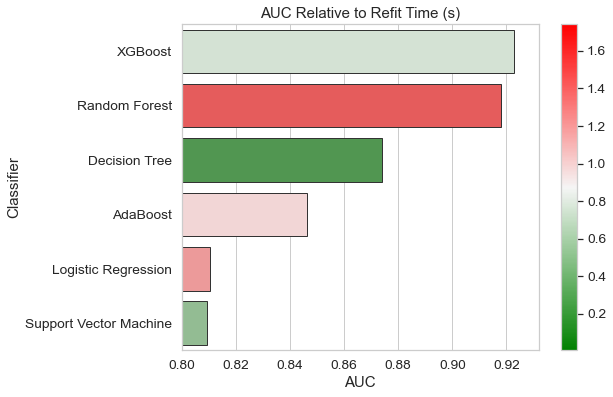

In [31]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

Overall XGBoost and Random Forest all perform pretty similarly and are within rounding error of each other -- any of them would suit us well, but we'll stick with the XGBoost since it has the highest AUC.

### Classification report

Let's now pull out the index of our best model from our results (i.e., the first index from the DataFrame, since it was sorted by descending AUC) and take a closer look at the classification report.

              precision    recall  f1-score   support

          No      0.973     0.891     0.930       570
         Yes      0.572     0.856     0.686        97

    accuracy                          0.886       667
   macro avg      0.773     0.873     0.808       667
weighted avg      0.915     0.886     0.895       667



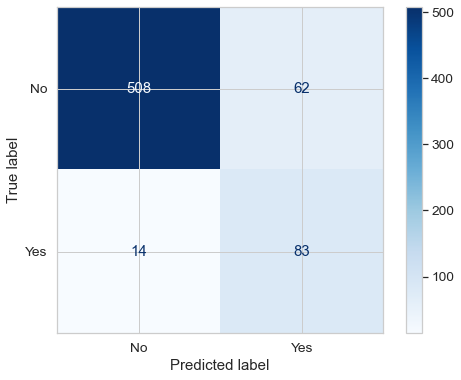

In [32]:
best_index = results.index[0]

plot_confusion_matrix(models[best_index], 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues,
                      values_format = 'd')

print(classification_report(y_test, preds[best_index], digits = 3))

Our best model (i.e. XGBoost) has a pretty impressive generalization performance on the test set with an accuracy of up to 89% so we can be quite confident to taking advantage of this model to predict future unseen data.

### Important features

<AxesSubplot:xlabel='importance', ylabel='feature'>

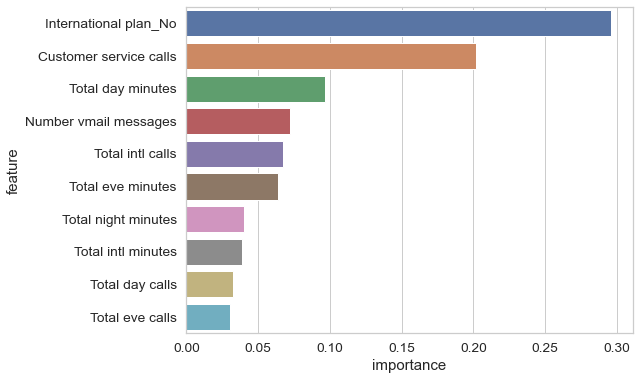

In [33]:
var_imp = pd.DataFrame({'feature': X_test.columns, 
                        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)

sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

Out of ten features, the three most important ones are `International plan_no`, `Customer service calls`, and `Total day minutes`. This means that international plan subscription, number of customer service calls and total minutes of day call have a great impact on the probability of customer churn.

## 5. Conclusion

- This project aims to develop a predictive model that predicts if a customer will cancel subscription and leave the company. The data set for model training and evaluation consists of 20 variables and 3,333 samples. Each sample represents a customer and each variable represents a feature about customer. The target variable is the binary variable `Churn` with two values: Yes indicates that the customer cancelled subscription and No indicates that the customer did not. The other 19 variables are all predictors, including customers’ demographic and usage data.

- This is a classification problem. We first conduct descriptive analysis to get a sense of relationships between target variable and predictors. However, in order to take into account interaction of predictors, we need to build machine learning models. Prior to developing a model, we need to conduct data preprocessing, including splitting the data set into train/test set, downsizing the train set to make class balance, imputing missing data, converting categorical variables into dummy variables, removing features with zero variance, and scaling the data.

- 6 different machine learning models were built for this analysis: Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, AdaBoost, and XGBoost. XGBoost outperforms other models based on AUC and the classification report shows that this XGBoost model can correctly predict 89% of samples in the test set.

- Three most important features in predicting target variable are international plan subscription, number of customer service calls and total minutes of day call. From a business standpoint, these findings can be explained as follows: customer without international plan subscription are more likely to churn; customers that make multiple calls to customer services are experiencing usage difficulties so they are more likely to churn; the more minutes customer call in the day, the more charges they incur and the more likely they will churn.  

- Based on those insights, the firm can take appropriate actions to retain customers that are likely to leave. With respect to international plan subscription, the telecom firm can discount the fee for the plan or offer gifts for customers that subscribe to international plans. Also, the firm needs to closely monitor problems that customers raise when they contact customer service center, making sure their problems are solved and never happen again. 

- This analysis provides a model that can be leveraged to predict if a particular client will churn based on her/his features. With that prediction, the telecommunication company can detect customers that are going to churn in order to figure out ways to retain them. This expect to improve the customer retention rate and boost the bottom line for the firm.

---